In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
### Explanatory Data Analysis ###

In [3]:
# for this code to work, need to to download this
# 1. Open Anaconda prompt
# 2. run this line "conda install -c anaconda pandas-datareader"

import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 4, 30)

df = web.DataReader("GOOG", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-24,1268.010010,1255.000000,1264.119995,1256.000000,1018800,1256.000000
2019-04-25,1267.407959,1252.030029,1264.770020,1263.449951,1107300,1263.449951
2019-04-26,1273.069946,1260.319946,1269.000000,1272.180054,1241400,1272.180054
2019-04-29,1289.270020,1266.295044,1274.000000,1287.579956,2499400,1287.579956
2019-04-30,1192.810059,1175.000000,1185.000000,1188.479980,6207000,1188.479980


In [5]:
# Moving Average (MA) smooths out price data by creating a constantly updated average price. 
# This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average 
# could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect 
# it will follow the trend and less likely to deviate outside its resistance point.

close_px = df['Adj Close']
mavg = close_px.rolling(window=50).mean()
mavg

Date
2018-01-02            NaN
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
2018-01-08            NaN
2018-01-09            NaN
2018-01-10            NaN
2018-01-11            NaN
2018-01-12            NaN
2018-01-16            NaN
2018-01-17            NaN
2018-01-18            NaN
2018-01-19            NaN
2018-01-22            NaN
2018-01-23            NaN
2018-01-24            NaN
2018-01-25            NaN
2018-01-26            NaN
2018-01-29            NaN
2018-01-30            NaN
2018-01-31            NaN
2018-02-01            NaN
2018-02-02            NaN
2018-02-05            NaN
2018-02-06            NaN
2018-02-07            NaN
2018-02-08            NaN
2018-02-09            NaN
2018-02-12            NaN
2018-02-13            NaN
                 ...     
2019-03-19    1115.304604
2019-03-20    1118.416204
2019-03-21    1121.521404
2019-03-22    1124.138203
2019-03-25    1126.591604
2019-03-26    1129.140205
2019-03-27    1131.706807
2019-03

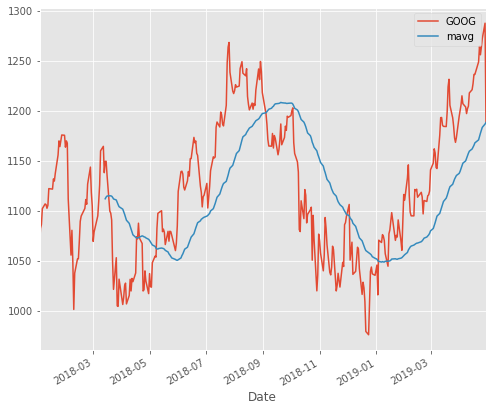

In [6]:
# Plotting the Moving Average

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='GOOG')
mavg.plot(label='mavg')
plt.legend()

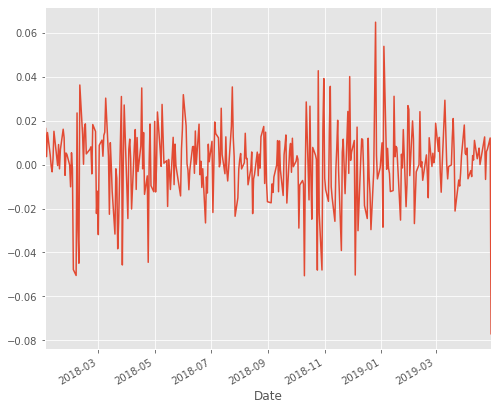

In [7]:
# Measure Expected Return

rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [62]:
# Creating lags 20 days back

for i in range(1,21):
    col_name = 'close' + str(i)
    df[col_name] = close_px.shift(i)
    
# Drop missing value
dfreg = df.dropna()
print(dfreg.head())

                   High          Low         Open        Close   Volume  \
Date                                                                      
2018-01-31  1173.000000  1159.130005  1170.569946  1169.939941  1538700   
2018-02-01  1174.000000  1157.520020  1162.609985  1167.699951  2412100   
2018-02-02  1123.069946  1107.277954  1122.000000  1111.900024  4857900   
2018-02-05  1110.000000  1052.030029  1090.599976  1055.800049  3798300   
2018-02-06  1081.709961  1023.137024  1027.180054  1080.599976  3448000   

              Adj Close       close1       close2       close3       close4  \
Date                                                                          
2018-01-31  1169.939941  1163.689941  1175.579956  1175.839966  1170.369995   
2018-02-01  1167.699951  1169.939941  1163.689941  1175.579956  1175.839966   
2018-02-02  1111.900024  1167.699951  1169.939941  1163.689941  1175.579956   
2018-02-05  1055.800049  1111.900024  1167.699951  1169.939941  1163.689941   


In [63]:
# Pre-processing & Splitting of 20 days lagged

X = dfreg.iloc[:,6:]
y = dfreg.iloc[:,5]

X_train = X.loc[:'2018-10-01']
X_test = X.loc['2018-10-02':]

print(X_train.iloc[:,1])
print(X_test.iloc[:,1])

X_train = X_train.values
X_test = X_test.values

y_train = y.loc[:'2018-10-01']
y_test = y.loc['2018-10-02':]

y_train = y_train.values
y_test = y_test.values

X_train.shape, y_train.shape, X_test.shape , y_test.shape

Date
2018-01-31    1175.579956
2018-02-01    1163.689941
2018-02-02    1169.939941
2018-02-05    1167.699951
2018-02-06    1111.900024
2018-02-07    1055.800049
2018-02-08    1080.599976
2018-02-09    1048.579956
2018-02-12    1001.520020
2018-02-13    1037.780029
2018-02-14    1051.939941
2018-02-15    1052.099976
2018-02-16    1069.699951
2018-02-20    1089.520020
2018-02-21    1094.800049
2018-02-22    1102.459961
2018-02-23    1111.339966
2018-02-26    1106.630005
2018-02-27    1126.790039
2018-02-28    1143.750000
2018-03-01    1118.290039
2018-03-02    1104.729980
2018-03-05    1069.520020
2018-03-06    1078.920044
2018-03-07    1090.930054
2018-03-08    1095.060059
2018-03-09    1109.640015
2018-03-12    1126.000000
2018-03-13    1160.040039
2018-03-14    1164.500000
                 ...     
2018-08-20    1206.489990
2018-08-21    1200.959961
2018-08-22    1207.770020
2018-08-23    1201.619995
2018-08-24    1207.329956
2018-08-27    1205.380005
2018-08-28    1220.650024
2018-08

((169, 20), (169,), (144, 20), (144,))

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [86]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.15476e-18): result may not be accurate.
  overwrite_a=False)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [81]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [87]:
# accuracy of model with train set

confidencereg = clfreg.score(X_train, y_train)
confidencepoly2 = clfpoly2.score(X_train, y_train)
confidencepoly3 = clfpoly3.score(X_train, y_train)
confidenceknn = clfknn.score(X_train, y_train)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

The linear regression accuracy is 0.9441624973356602
The quadratic regression 2 accuracy is 0.9999999999996123
The quadratic regression 3 accuracy is 0.9999999999999999
The knn regression accuracy is 0.9775827123738013


In [88]:
# accuracy of model with test set

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

The linear regression accuracy is 0.8954490423839695
The quadratic regression 2 accuracy is -0.012397715520139796
The quadratic regression 3 accuracy is 0.22343862983301166
The knn regression accuracy is 0.6116417199054146


In [89]:
# rmse of model with test set

from sklearn.metrics import mean_squared_error
from math import sqrt

rmsereg = sqrt(mean_squared_error(y_test, clfreg.predict(X_test)))
rmsepoly2 = sqrt(mean_squared_error(y_test, clfpoly2.predict(X_test)))
rmsepoly3 = sqrt(mean_squared_error(y_test, clfpoly3.predict(X_test)))
rmseknn = sqrt(mean_squared_error(y_test, clfknn.predict(X_test)))

# results
print('The linear regression rmse is', rmsereg)
print('The quadratic regression 2 rmse is', rmsepoly2)
print('The quadratic regression 3 rmse is', rmsepoly3)
print('The knn regression rmse is', rmseknn)

The linear regression rmse is 22.355740151197555
The quadratic regression 2 rmse is 69.56657526761553
The quadratic regression 3 rmse is 60.9274408803739
The knn regression rmse is 43.08651122131027


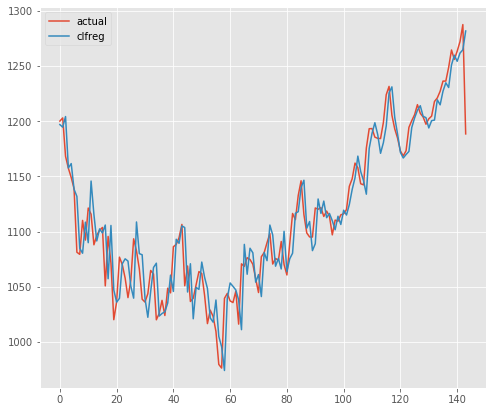

In [90]:
# plot of estimated and actual close price

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

y_test = pd.DataFrame(y_test)
y_clfreg = pd.DataFrame(clfreg.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfreg, label="clfreg")

plt.legend()

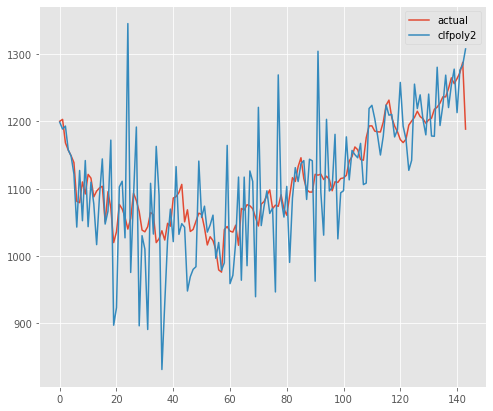

In [72]:
y_test = pd.DataFrame(y_test)
y_clfpoly2 = pd.DataFrame(clfpoly2.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfpoly2, label="clfpoly2")

plt.legend()

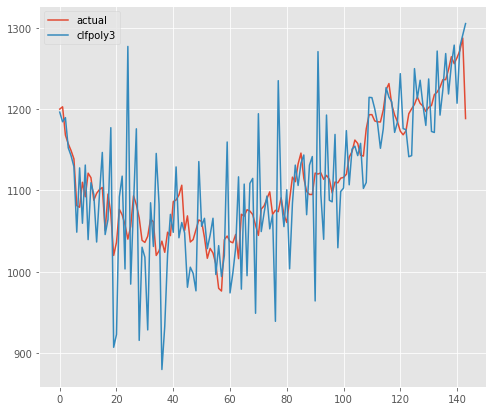

In [73]:
y_test = pd.DataFrame(y_test)
y_clfpoly3 = pd.DataFrame(clfpoly3.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfpoly3, label="clfpoly3")

plt.legend()

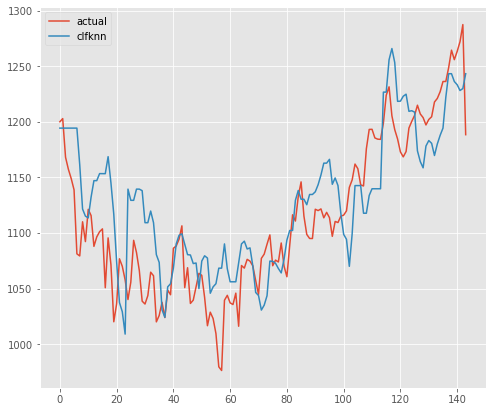

In [77]:
y_test = pd.DataFrame(y_test)
y_clfknn = pd.DataFrame(clfknn.predict(X_test))

plt.plot(y_test, label="actual")
plt.plot(y_clfknn, label="clfknn")

plt.legend()

In [50]:
# Autocorrelation suggest that the model will be overfitted. Hence, we expect a high test rmse. 
# But when the model is applied to the test set,the test rmse is suprisingly quite low. 

# Why?! 
# Possible suggestions:
# - no. of data points is too low (?)
# -> realised that the train-test split was randomnised and not split on a fixed date
# randomnized -> takes into account seasonality? 
# fixed date -> does not take into account seasonality?

# for time-series analysis, new data points that you'll get will be future dates, so doesn't make sense if you randomnise the 
# split since you'll be trying to predict future dates with the model. But at the same time, date was not one of the IVs used 
# in the model

# Next step:
# - use 20 years historical data
# - match quarter to quarter data to take into account the seasonaility of the stock prices